**工程完整信息与更多演示：**
- 博主个人主页：[三余知行官方网站](https://threefish.site/trend)
- GitHub Repo：[ThreeFish-AI/deep-learning](https://github.com/ThreeFish-AI/deep-learning)

# 数据准备

前置准备：

In [ ]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [1]:
from sklearn.datasets import fetch_openml


mnist = fetch_openml('mnist_784', version=1)
print(mnist.keys())
# dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])


In [2]:
### 查看数据集
X, y = mnist["data"], mnist["target"]
print(X.shape)
# (70000, 784)

print(y.shape)
# (70000,)

print(y[:1][0])
# 5

print(X[:1].shape)
# (1, 784)

(70000, 784)
(70000,)
5
(1, 784)


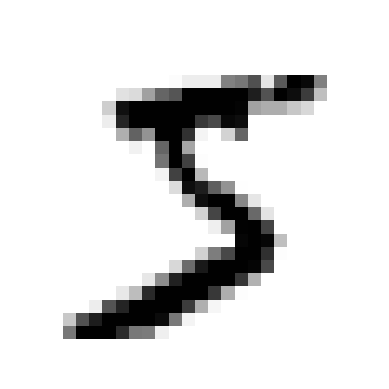

In [3]:
import matplotlib.pyplot as plt
import matplotlib as mpl

def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = mpl.cm.binary, interpolation="nearest")
    plt.axis("off")

some_digit = X[:1].to_numpy()
plot_digit(some_digit)
plt.show()

In [4]:
x_train, x_test, t_train, t_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [5]:
print('训练集输入数据的形状：', x_train.shape)    # (60000, 784)
print('训练集输出标签的形状：', t_train.shape)    # (60000,)
print('测试集输入数据的形状：', x_test.shape)     # (10000, 784)
print('测试集输出标签的形状：', t_test.shape)     # (10000,)

# 训练集输入数据的形状： (60000, 784)
# 训练集输出标签的形状： (60000,)
# 测试集输入数据的形状： (10000, 784)
# 测试集输出标签的形状： (10000,)

训练集输入数据的形状： (60000, 784)
训练集输出标签的形状： (60000,)
测试集输入数据的形状： (10000, 784)
测试集输出标签的形状： (10000,)


# 推理过程

In [6]:
from sklearn.neural_network import MLPClassifier
import pickle

# 初始化并训练神经网络模型
# hidden_layer_sizes=(50, 100) 表示第 1 层 50 个神经元，第 2 层 100 个神经元
# max_iter=20 表示最大迭代次数为 20
# random_state=42 表示随机种子为 42
model = MLPClassifier(hidden_layer_sizes=(50, 100), max_iter=20, random_state=42)
# fit 表示训练模型，得到“最佳”的权重参数
model.fit(x_train, t_train)

# 保存模型的样本权重
weight_params = model.coefs_
bias_params = model.intercepts_

W = {'W'+str(i+1): weight_params[i] for i in range(len(weight_params))}
B = {'b'+str(i+1): bias_params[i] for i in range(len(bias_params))}
network = {**W, **B}

with open('sample_weight.pkl', 'wb') as f:
    pickle.dump(network, f, -1)

/Users/cm.huang/Documents/workspace/projects/aurelius/deep-learning/.venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


In [8]:
import pickle


def init_network(model_file='sample_weight.pkl'):
    with open(model_file, 'rb') as f:
        network = pickle.load(f)
    return network

# 查看模型权重参数
network = init_network()
W1, W2, W3 = network['W1'], network['W2'], network['W3']
b1, b2, b3 = network['b1'], network['b2'], network['b3']
print('W1 shape:', W1.shape)
print('W2 shape:', W2.shape)
print('W3 shape:', W3.shape)
print('b1 shape:', b1.shape)
print('b2 shape:', b2.shape)
print('b3 shape:', b3.shape)

# 可以看到加载的权重参数形状与上文前向传播中介绍的相符：
# W1 shape: (784, 50)
# W2 shape: (50, 100)
# W3 shape: (100, 10)
# b1 shape: (50,)
# b2 shape: (100,)
# b3 shape: (10,)

W1 shape: (784, 50)
W2 shape: (50, 100)
W3 shape: (100, 10)
b1 shape: (50,)
b2 shape: (100,)
b3 shape: (10,)


In [9]:
# 查看模型的权重参数
print('Layer 1 weights(W1):', W1)
print('Layer 2 weights(W2):', W2)
print('Layer 3 weights(W3):', W3)
print('Layer 1 biases(b1):', b1)
print('Layer 2 biases(b2):', b2)
print('Layer 3 biases(b3):', b3)

Layer 1 weights(W1): [[-6.82908655e-134  2.73817863e-124  7.86086298e-131 ... -2.51158996e-136
  -1.87750455e-135  6.86738504e-129]
 [-1.02093698e-123  4.38144943e-130 -1.02999203e-124 ... -2.04415070e-135
   2.07573547e-123  3.21365984e-126]
 [ 7.89668810e-124  1.83923575e-133  3.86927841e-132 ...  2.09755758e-137
  -1.63732471e-124  2.42258346e-131]
 ...
 [-5.86543224e-136 -7.17964025e-133 -2.61980264e-136 ... -1.45588920e-127
   7.93626954e-130 -1.38863587e-129]
 [ 7.19221960e-134  9.15123409e-127 -1.59973454e-135 ... -9.50850957e-134
  -8.63101967e-131  4.52899308e-127]
 [ 2.21426762e-123 -8.68062610e-138  9.65843942e-134 ...  4.04295961e-127
   6.60988568e-132 -2.27081575e-123]]
Layer 2 weights(W2): [[-0.07216008  0.03237817 -0.30696488 ... -0.03664662  0.07658222
   0.02644618]
 [ 0.16774598  0.02235196 -0.11842245 ... -0.04932866  0.01448016
   0.0207693 ]
 [-0.11351393  0.15539243  0.00259248 ... -0.18830871 -0.1148917
   0.02773119]
 ...
 [ 0.06451093  0.02327634 -0.1132122  .

# 推理与评估

In [10]:
# 用于评估模型的表现
from sklearn.metrics import classification_report, accuracy_score

# 进行推理（只取测试集进行推理效果测试，暂时丢弃训练集）
t_pred = model.predict(x_test)

# 输出结果
print(f"准确率: {accuracy_score(t_test, t_pred)}")
print(classification_report(t_test, t_pred))

准确率: 0.9499
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.98      0.98      0.98      1135
           2       0.95      0.95      0.95      1032
           3       0.93      0.93      0.93      1010
           4       0.97      0.92      0.94       982
           5       0.95      0.93      0.94       892
           6       0.97      0.96      0.96       958
           7       0.97      0.94      0.96      1028
           8       0.91      0.95      0.93       974
           9       0.91      0.95      0.93      1009

    accuracy                           0.95     10000
   macro avg       0.95      0.95      0.95     10000
weighted avg       0.95      0.95      0.95     10000



In [11]:
import numpy as np

def relu(x):
    return np.maximum(0, x)

def softmax(a):
    exp_a = np.exp(a)
    sum_exp_a = np.sum(exp_a)
    return exp_a / sum_exp_a

def predict(network, x):
    """推理方法

    Args:
        network: dict，包含了所有 W、B 等权重参数的“神经网络模型”；
        x: nparray，输入数据，此处是图片的像素数组表示；
    Returns:
        y: nparray，推理结果，此处是图片分别为 0 ~ 9 的概率；
    """
    W1, W2, W3 = network['W1'], network['W2'], network['W3']    # 第 1 层、第 2 层、输出层分别的权重
    b1, b2, b3 = network['b1'], network['b2'], network['b3']    # 第 1 层、第 2 层、输出层分别的偏置
    a1 = np.dot(x, W1) + b1                                     # 第 1 层加权和
    z1 = relu(a1)                                               # 第 1 层加权和经过 relu 激活函数转换的结果
    a2 = np.dot(z1, W2) + b2                                    # 第 2 层加权和
    z2 = relu(a2)                                               # 第 2 层加权和经过 relu 激活函数转换的结果
    a3 = np.dot(z2, W3) + b3                                    # 输出层加权和
    y = softmax(a3)                                             # 输出层加权和经过 softmax 激活函数转换的结果
    return y

# 使用 network 模型进行推理测试
network = init_network()

print('Total number of samples:', len(x_test))

accuracy_cnt = 0
for i in range(len(x_test)):
    y = predict(network, x_test.iloc[i])
    # 获取概率最高的元素的索引
    p = np.argmax(y)
    # 判断是否与标签相符
    if p == int(t_test.iloc[i]):
        accuracy_cnt += 1
    else:
        print(f"Sample {i} - Predicted: {p}, Actual: {t_test.iloc[i]}")

print("Accuracy:", str(float(accuracy_cnt) / len(x_test)))

Total number of samples: 10000
Sample 8 - Predicted: 6, Actual: 5
Sample 63 - Predicted: 2, Actual: 3
Sample 111 - Predicted: 1, Actual: 7
Sample 115 - Predicted: 9, Actual: 4
Sample 130 - Predicted: 5, Actual: 6
Sample 149 - Predicted: 9, Actual: 2
Sample 151 - Predicted: 8, Actual: 9
Sample 195 - Predicted: 9, Actual: 3
Sample 211 - Predicted: 9, Actual: 5
Sample 241 - Predicted: 3, Actual: 9
Sample 247 - Predicted: 2, Actual: 4
Sample 250 - Predicted: 9, Actual: 4
Sample 259 - Predicted: 0, Actual: 6
Sample 287 - Predicted: 2, Actual: 4
Sample 315 - Predicted: 3, Actual: 9
Sample 320 - Predicted: 1, Actual: 9
Sample 321 - Predicted: 7, Actual: 2
Sample 340 - Predicted: 3, Actual: 5
Sample 352 - Predicted: 0, Actual: 5
Sample 376 - Predicted: 9, Actual: 4
Sample 421 - Predicted: 3, Actual: 2
Sample 432 - Predicted: 5, Actual: 4
Sample 445 - Predicted: 0, Actual: 6
Sample 447 - Predicted: 9, Actual: 4
Sample 450 - Predicted: 5, Actual: 3
Sample 507 - Predicted: 9, Actual: 3
Sample 522

**工程完整信息与更多演示：**
- 博主个人主页：[三余知行官方网站](https://threefish.site/trend)
- GitHub Repo：[ThreeFish-AI/deep-learning](https://github.com/ThreeFish-AI/deep-learning)